In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **read data**

In [3]:
train=pd.read_csv("/content/drive/MyDrive/final project/Predicting Disaster Tweets/train.csv")

# **check the head and info of data**




In [4]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
train.shape

(7613, 5)

# **if there are missing value &percentage**

In [7]:
missing_val=train.isna().sum().sum()


In [8]:
missing_val

2594

In [9]:
persentageofmissing= (missing_val/train.shape[0])*100
persentageofmissing

34.073295678444765

#  how many data in each **class**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


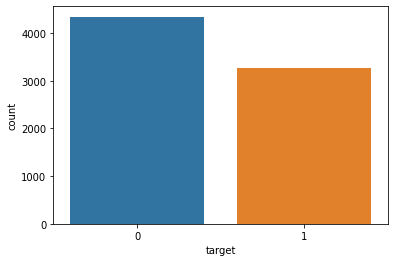

In [10]:
sns.countplot(train['target'])

# **Get the top 15 locations of the data**

In [11]:
train['location'].value_counts().head(15) 

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Washington, DC      21
Kenya               20
Worldwide           19
Australia           18
Chicago, IL         18
Name: location, dtype: int64

In [12]:
dis_locations = train[train['target']==1]['location'].value_counts()[:15]
dis_locations

USA                 67
United States       27
Nigeria             22
India               20
Mumbai              19
UK                  16
London              16
New York            16
Washington, DC      15
Canada              13
Worldwide           12
Washington, D.C.     9
Chicago, IL          9
Australia            9
Indonesia            8
Name: location, dtype: int64

In [13]:
not_dis_locations = train[train['target']==0]['location'].value_counts()[:15]
not_dis_locations 

New York           55
USA                37
London             29
United States      23
Los Angeles, CA    18
Canada             16
Kenya              15
Everywhere         12
Florida            11
UK                 11
California         10
NYC                10
United Kingdom     10
ss                  9
London, England     9
Name: location, dtype: int64

# dis_location

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


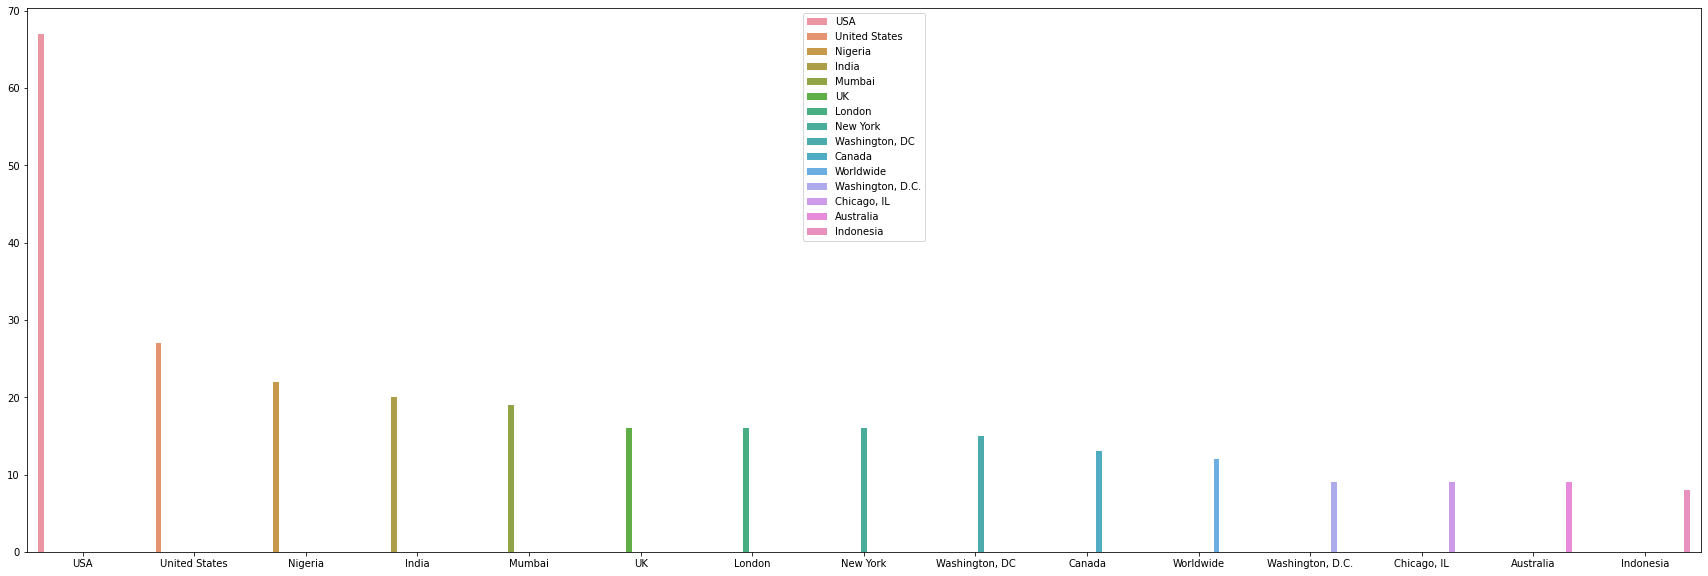

In [14]:
plt.figure(figsize=(30,10))
sns.barplot(dis_locations.index,dis_locations.values,capsize=.4,hue=dis_locations.index) 

plt.show()

# not_dis_location


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


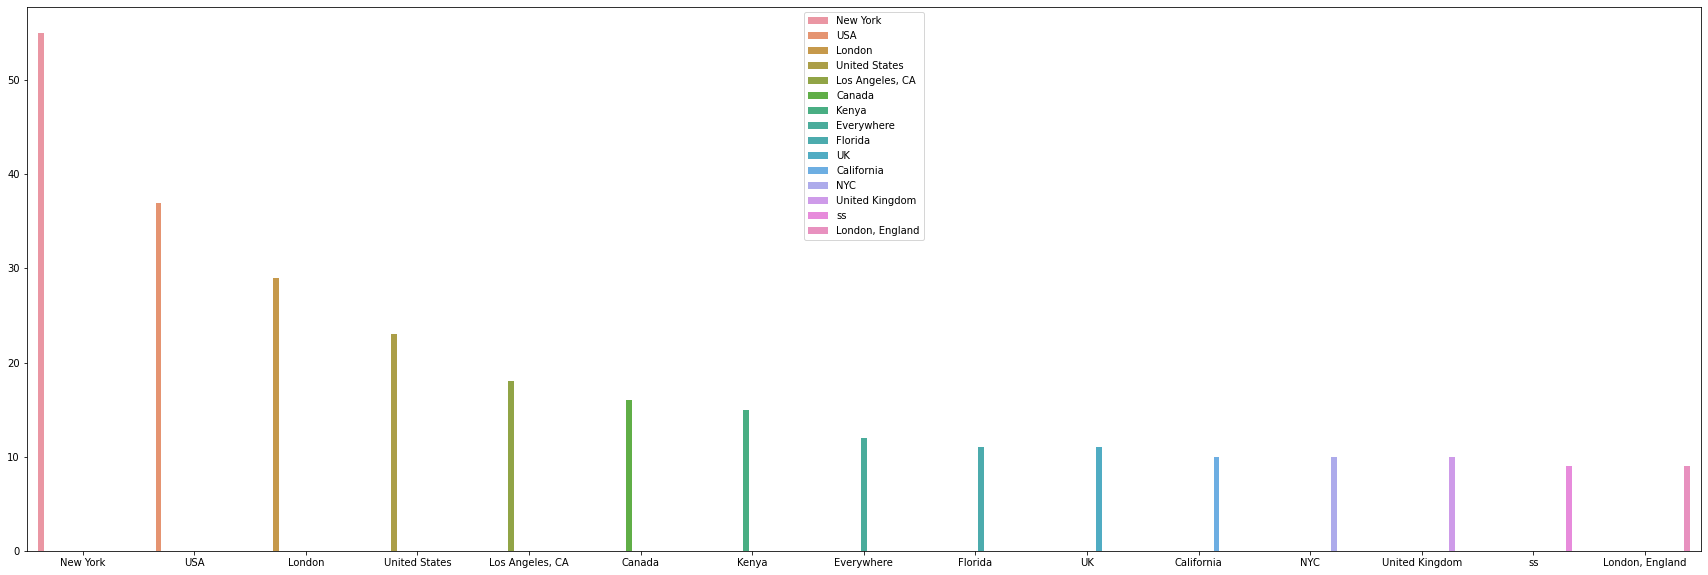

In [15]:
plt.figure(figsize=(30,10))
sns.barplot(not_dis_locations.index,not_dis_locations.values,capsize=.4,hue=not_dis_locations.index) 

plt.show()

# **Get the top 15 keyword in the data**

In [16]:
dis_key = train[train['target']==1]['keyword'].value_counts()[:15]
dis_key

derailment             39
wreckage               39
outbreak               39
debris                 37
oil%20spill            37
typhoon                37
evacuated              32
suicide%20bombing      32
rescuers               32
suicide%20bomb         32
nuclear%20disaster     31
razed                  31
suicide%20bomber       30
earthquake             30
airplane%20accident    30
Name: keyword, dtype: int64

In [17]:
not_dis_key = train[train['target']==0]['keyword'].value_counts()[:15]
not_dis_key

body%20bags    40
harm           37
armageddon     37
wrecked        36
ruin           36
deluge         36
explode        35
twister        35
fear           35
siren          35
aftershock     34
panic          34
screaming      34
blizzard       33
blazing        33
Name: keyword, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


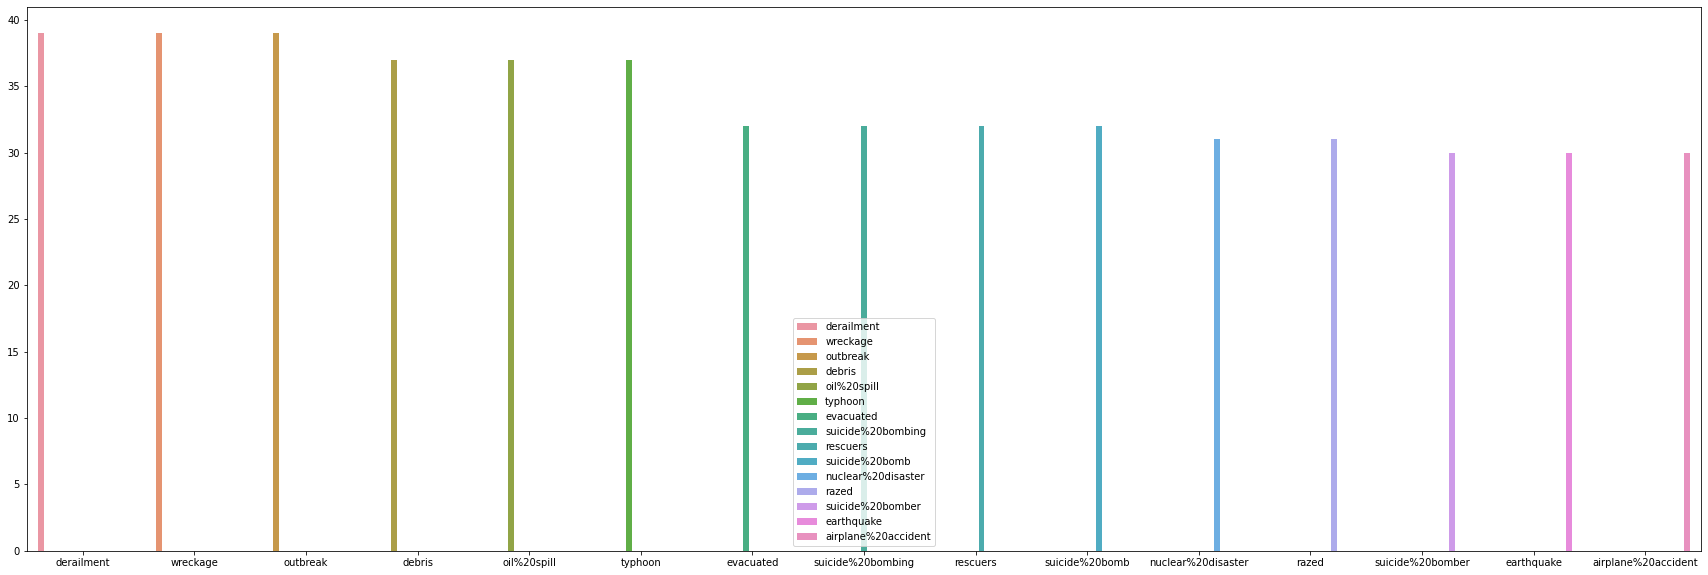

In [18]:
plt.figure(figsize=(30,10))

sns.barplot(dis_key.index,dis_key.values,capsize=.4,hue=dis_key.index) 

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


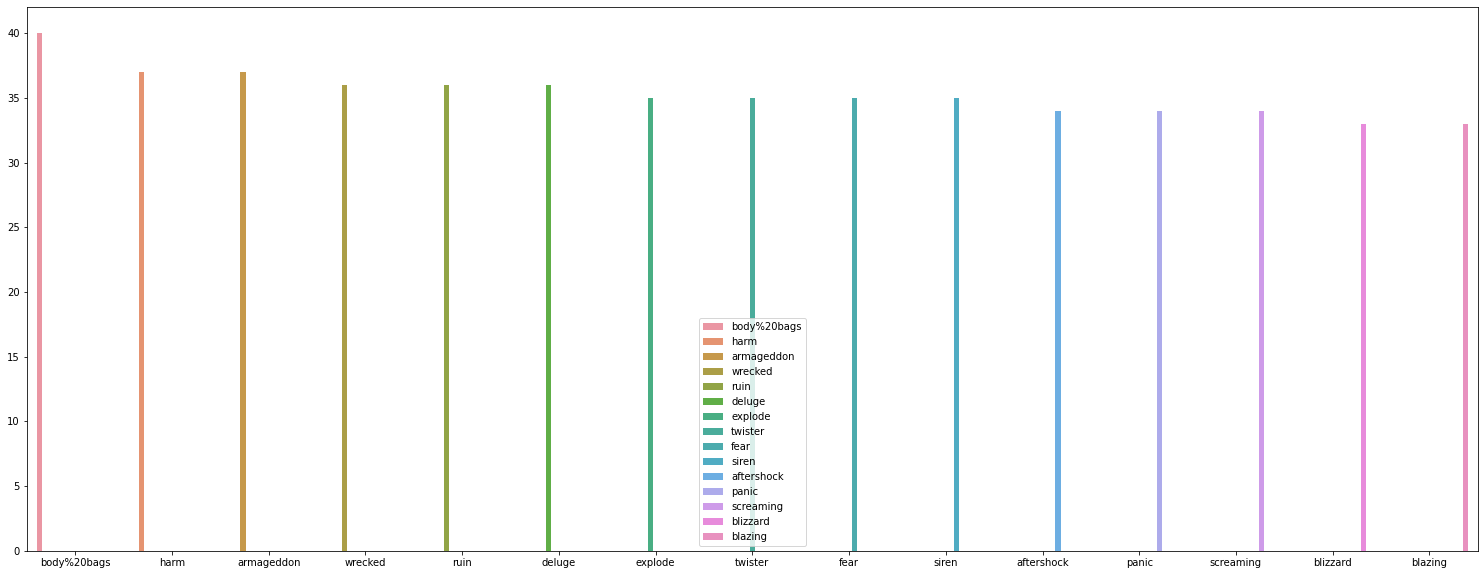

In [24]:
plt.figure(figsize=(26,10))

sns.barplot(not_dis_key.index,not_dis_key.values,capsize=4,hue=not_dis_key.index)
plt.show()

# what are the most common words

In [20]:
import re
tweets=train['text']
for i in range(2,11,1):
  print(tweets[i])    

All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
13,000 people receive #wildfires evacuation orders in California 
Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 
#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires
#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas
I'm on top of the hill and I can see a fire in the woods...
There's an emergency evacuation happening now in the building across the street
I'm afraid that the tornado is coming to our area...
Three people died from the heat wave so far


In [21]:
def removing_unicodes(word):
  temp = word.encode("ascii", "ignore")
  temp = temp.decode()
  return temp 

In [22]:
def clean_texts(text):
  text = re.sub(r'#\w*','',text) #removing hashtags
  text = re.sub(r'@\w*','',text) #removing menthions
  text = re.sub(r'https?:\S*','',text) #removing links
  text = re.sub(r'\d+','',text) #removing numbers
  text = re.sub(r'\W+',' ',text) #removing panctuation & non words like (- , :)
  text = re.sub(r'_','',text) #removing underscore symbol
  text = re.sub(r'^\s','',text) #removing spaces at the begain of the sentences
  text = re.sub(r'\s$','',text) #removing spaces at the end of the sentences
  
  
  return text




**cleaning the tweets**

In [23]:
no_uni_tweets = []
for tweet in tweets:
  no_uni_tweets.append(removing_unicodes(tweet)) 

In [25]:
cleaned_tweets = []
for tweet in no_uni_tweets:
  cleaned_tweets.append(clean_texts(tweet))

In [26]:
tweets = []
for tweet in cleaned_tweets:
  tweets.append(tweet.split())

In [27]:
words = []
for sentence in tweets:
  for word in sentence:
    words.append(word) 

In [28]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

def remove_stopwords(words):
  non_stop_words = []
  for word in words:
    if word.lower() not in stop_words:
      non_stop_words.append(word)
  return non_stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [29]:
words_without_stop_words = remove_stopwords(words) 

In [30]:
from collections import Counter
count_words = Counter(words_without_stop_words).most_common(15)
count_words 

[('amp', 344),
 ('like', 324),
 ('via', 213),
 ('get', 184),
 ('fire', 174),
 ('people', 166),
 ('one', 158),
 ('would', 124),
 ('California', 113),
 ('got', 106),
 ('new', 106),
 ('know', 104),
 ('New', 104),
 ('video', 101),
 ('day', 100)]

In [31]:
x = []
y = []
for i in range(len(count_words)):
    x.append(count_words[i][0])
for i in range(len(count_words)):
    y.append(count_words[i][1]) 

In [32]:
def count_stop_words(words):
  swords = []
  for word in words:
    if word in stop_words:
      swords.append(word)
  return swords

In [33]:
stop_words_in_text = count_stop_words(words)
count_stop_words = Counter(stop_words_in_text).most_common(15)
count_stop_words

[('the', 2603),
 ('a', 1890),
 ('to', 1819),
 ('in', 1782),
 ('of', 1738),
 ('and', 1320),
 ('for', 829),
 ('is', 827),
 ('s', 803),
 ('on', 798),
 ('you', 749),
 ('it', 611),
 ('that', 555),
 ('my', 552),
 ('with', 518)]

In [34]:
x = []
y = []
for i in range(len(count_stop_words)):
    x.append(count_stop_words[i][0])
for i in range(len(count_stop_words)):
    y.append(count_stop_words[i][1]) 

In [35]:
keywords = np.array(train['keyword'])

In [36]:
disaster_keywords = []
not_disaster_keywords = []

for i in range(len(keywords)):
  if keywords[i] is not np.nan and train['target'][i]==1:
    disaster_keywords.append(keywords[i])

for i in range(len(keywords)):
  if keywords[i] is not np.nan and train['target'][i]==0:
    not_disaster_keywords.append(keywords[i])

disaster_keywords = disaster_keywords[:500]
not_disaster_keywords = not_disaster_keywords[:500]

In [37]:
additional_data = []
additional_data_labels = []

for i in range(len(disaster_keywords)):
  additional_data.append(disaster_keywords[i])
  additional_data_labels.append(1)
  additional_data.append(not_disaster_keywords[i])
  additional_data_labels.append(0)

In [38]:
len(tweets)

7613

In [39]:
for keyword in additional_data:
  temp =[]
  temp.append(keyword)
  tweets.append(temp)

len(tweets)

8613

In [40]:
labels = []
for label in train['target']:
  labels.append(label)

In [41]:
for label in additional_data_labels:
  labels.append(label)
len(labels)

8613

In [42]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [43]:
##removing stopwords from training 
for tweet in tweets:
  for word in tweet:
    if word.lower() in stop_words or word in stop_words:
      tweet.remove(word)

In [44]:
##all lower
Tweets = []
for tweet in tweets:
  tweet = [word.lower() for word in tweet ]
  Tweets.append(tweet)

In [45]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(Tweets)
sequences = tokenizer.texts_to_sequences(Tweets)
sequences[:1]

[[4110, 1, 782, 39, 88, 2641, 4111, 42]]

In [46]:
padded_sequences = pad_sequences(sequences,maxlen=25)
padded_sequences[:2]  

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0, 4110,    1,  782,   39,   88,
        2641, 4111,   42],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,  148,   10,  183,  725,
        5945, 5946, 1285]], dtype=int32)

In [47]:
test=pd.read_csv('/content/drive/MyDrive/final project/Predicting Disaster Tweets/test.csv')

In [48]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [49]:
text=test['text']

In [51]:
#removing unicode charcters
no_uni_tweets_test = []
for tweet in text:
  no_uni_tweets_test.append(removing_unicodes(tweet)) 

In [53]:
#Cleaing
cleaned_tweets_test = []
for tweet in no_uni_tweets_test:
  cleaned_tweets_test.append(clean_texts(tweet))  

In [54]:
#Split all tweets
tweets_test = []
for tweet in cleaned_tweets_test:
  tweets_test.append(tweet.split())  

In [55]:
for tweet in tweets_test:
  for word in tweet:
    if word.lower() in stop_words or word in stop_words:
      tweet.remove(word)

In [56]:
Tweets_test = []
for tweet in tweets_test:
  tweet = [word.lower() for word in tweet ]
  Tweets_test.append(tweet) 

In [57]:
tokenizer_test = Tokenizer()
tokenizer_test.fit_on_texts(Tweets_test)
sequences_test = tokenizer_test.texts_to_sequences(Tweets_test)
sequences_test[:2] 

[[500, 897, 78, 53], [211, 14, 1749, 1013, 658, 816, 358]]

In [58]:
padded_sequences_test = pad_sequences(sequences_test,maxlen=25)
padded_sequences_test[:2] 

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  500,
         897,   78,   53],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,  211,   14, 1749, 1013,
         658,  816,  358]], dtype=int32)

In [59]:
train = padded_sequences
test = padded_sequences_test 

In [60]:
X_train = np.array(train)
y_train = np.array(labels)
y_train = y_train.reshape(-1,1)

In [61]:
y_train.shape 

(8613, 1)

In [62]:
vocab_size = len(tokenizer.word_index)
vocab_size 

12967

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=42)

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Embedding,Dropout
import tensorflow as tf
model = Sequential()
model.add(Embedding(vocab_size+1,12,input_length=25))

model.add(LSTM(256))

model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(1,activation='sigmoid'))
model.compile(loss="binary_crossentropy",optimizer='RMSprop',metrics=['accuracy'])
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 12)            155616    
                                                                 
 lstm (LSTM)                 (None, 256)               275456    
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 128)               4224      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [65]:
history = model.fit(X_train,y_train,epochs=3,validation_data=(X_val,y_val),verbose=1) 

Epoch 1/3
202/202 [==============================] - 23s 98ms/step - loss: 0.6093 - accuracy: 0.6595 - val_loss: 0.4854 - val_accuracy: 0.7744
Epoch 2/3
202/202 [==============================] - 19s 94ms/step - loss: 0.4160 - accuracy: 0.8209 - val_loss: 0.4649 - val_accuracy: 0.7929
Epoch 3/3
202/202 [==============================] - 21s 106ms/step - loss: 0.3634 - accuracy: 0.8512 - val_loss: 0.5084 - val_accuracy: 0.7883


Text(0.5, 0, 'Epochs')

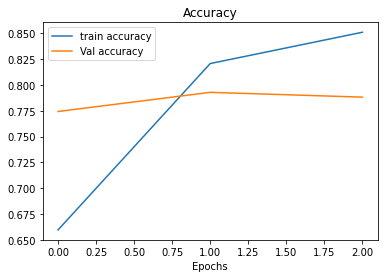

In [69]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train accuracy','Val accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs') 

Text(0.5, 0, 'epochs')

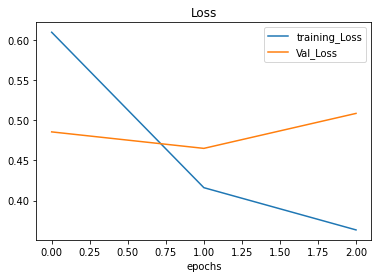

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training_Loss','Val_Loss'])
plt.title('Loss')
plt.xlabel('epochs')  

In [82]:
model.evaluate(X_val,y_val,verbose=2)

68/68 - 2s - loss: 0.5084 - accuracy: 0.7883 - 2s/epoch - 34ms/step


[0.508377730846405, 0.7883008122444153]

In [83]:
#save model
from keras.models import load_model
model.save("model.h5")